In [3]:
import filtering_util
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Filtering gaze data
This exercise introduces different techniques for processing and analyzing gaze data using filtering. In particular the exercise removing noise and identifying fixations and saccades in the signal. A _fixation_ is defined as an instance with little or no eye movement. A _saccade_ is an eye movement between two fixations as illustrated in [Figure 1](#fix_sacc) for an example (image from [researchGate](https://www.researchgate.net/publication/356796000_TECHNICAL_MANUALS_READING_STRATEGIES_OF_PRIMARY_TEACHER_TRAINESS/figures?lo=1)
).
<div class="has-text-centered">
<figure class="image is-inline-block" id="fix_sacc">

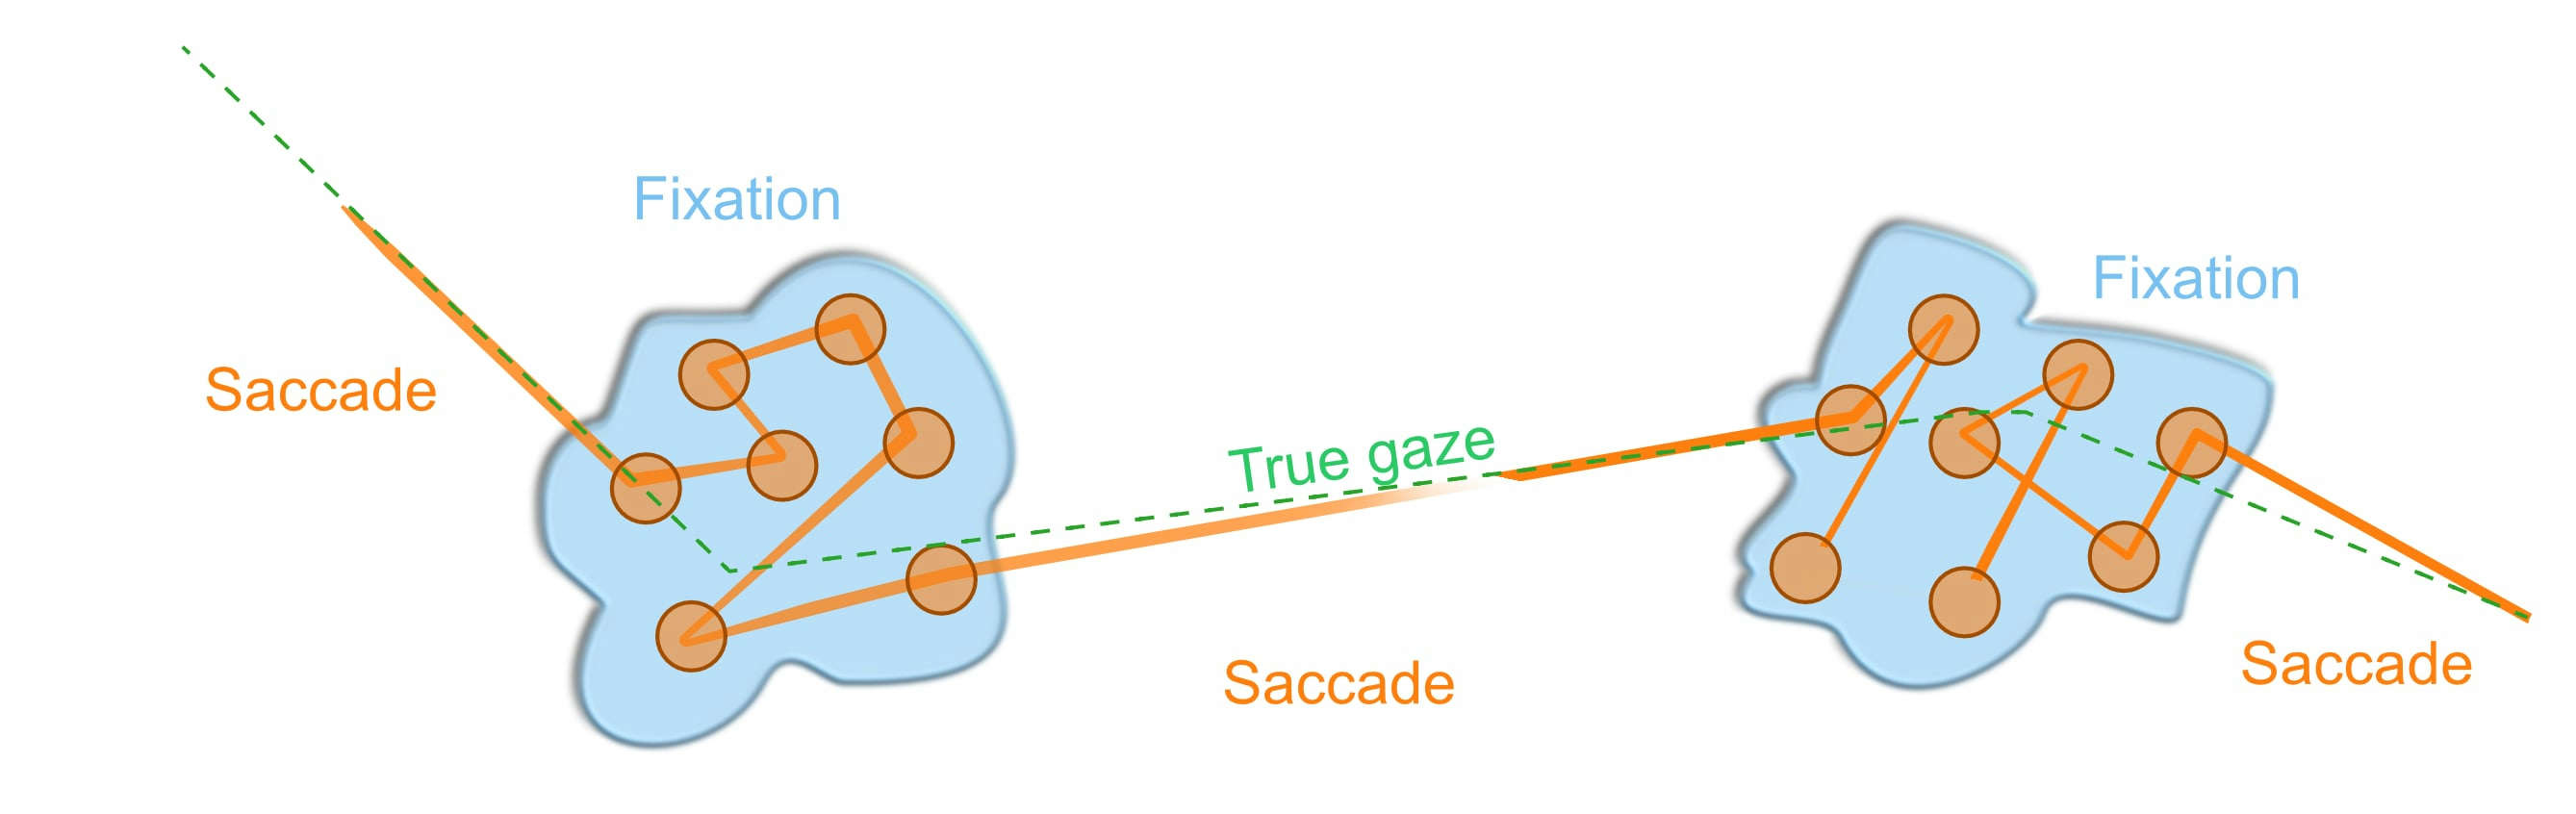

<figcaption class="figure-caption has-text-centered">Figure 1: Fixation and saccades in gaze data.
</figcaption>
</figure>
</div>
The visualizations presented throughout the exercise are based on data collected from `test_subject_3`
 using the `grid`
 pattern.
The exercise contains functions in the `filtering_util.py`
 file to create plots. 

<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#task_load_data">Task 1: Load the data</a>
            </li>
            <li>
            <a href="#task_gauss1">Task 2: Gaussian filter</a>
            </li>
            <li>
            <a href="#task_gauss2">Task 3: Implementing gaussian filter</a>
            </li>
            <li>
            <a href="#task_gauss3">Task 4: Reflect on applying gaussian filter</a>
            </li>
            <li>
            <a href="#task_gauss4">Task 5: Partial derivatives</a>
            </li>
            <li>
            <a href="#partial1">Task 6: Calculate the derivatives</a>
            </li>
            <li>
            <a href="#partial2">Task 7: Derivatives of a signal</a>
            </li>
            <li>
            <a href="#partial3">Task 8: Saccade detection</a>
            </li>
            <li>
            <a href="#partial4">Task 9: Saccade detection</a>
            </li>
            <li>
            <a href="#fixations1">Task 10: Fixation detection</a>
            </li>
            <li>
            <a href="#fixations2">Task 11: Visualization of signals</a>
            </li>
            <li>
            <a href="#fixation3">Task 12: Noise handling during fixations</a>
            </li>
            <li>
            <a href="#fixation4">Task 13: Frame grouping</a>
            </li>
            <li>
            <a href="#results1">Task 14: Analyse results</a>
            </li>
            <li>
            <a href="#results2">Task 15: Reflect</a>
            </li>
            <li>
            <a href="#owndata">Task 16: Combined signal</a>
            </li>
            <li>
            <a href="#combined1">Task 17: Combined signal</a>
            </li>
            <li>
            <a href="#combined2">Task 18: Reflect</a>
            </li>
        </ul>
    </div>
</article>

**Note:** Although the number of tasks is substantial, each requires minimal programming effort, with many tasks primarily necessitating reflection on the outcomes.

<article class="message task"><a class="anchor" id="task_load_data"></a>
    <div class="message-header">
        <span>Task 1: Load the data</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Run the cell to visualize the `grid`
 pattern of `test_subject_3`
.
**Note:** The code is loading the data from the folder of week 6. Alternatively you can copy the data to the folder of this exercise and change the file path accordingly.





</div></article>



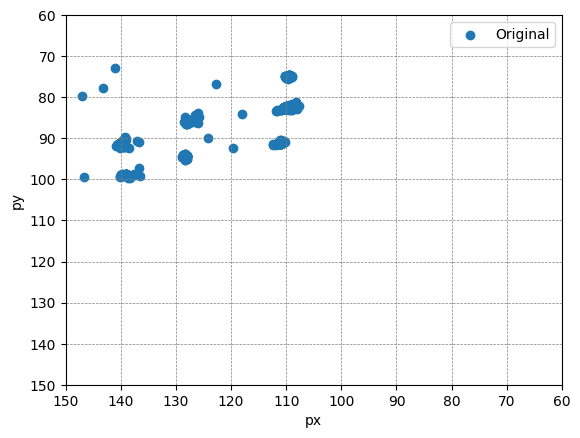

In [7]:
test_subject = 'group-21-luha'

csv_file =f'../../assignment_1/data/output/{test_subject}/grid/pupil_coordinates.csv'

pupil_coor = filtering_util.load_csv1(csv_file)

filtering_util.plot_pupil_coor(pupil_coor['px'], pupil_coor['py'], 'Original')
plt.show()

The next task involves visualizing the pupil coordinates signals `px`
 and `py`
 for the gaze `grid`
 pattern. In this task, a $1D$ Gaussian filter will be applied to smooth the signals individually. [Figure 2](#gauss) illustrates the Gaussian $1D$ filters and the corresponding filtered signal. The cell below convolves a Gaussian filter to gaze data. 
<div class="has-text-centered">
<figure class="image is-inline-block" id="gauss">

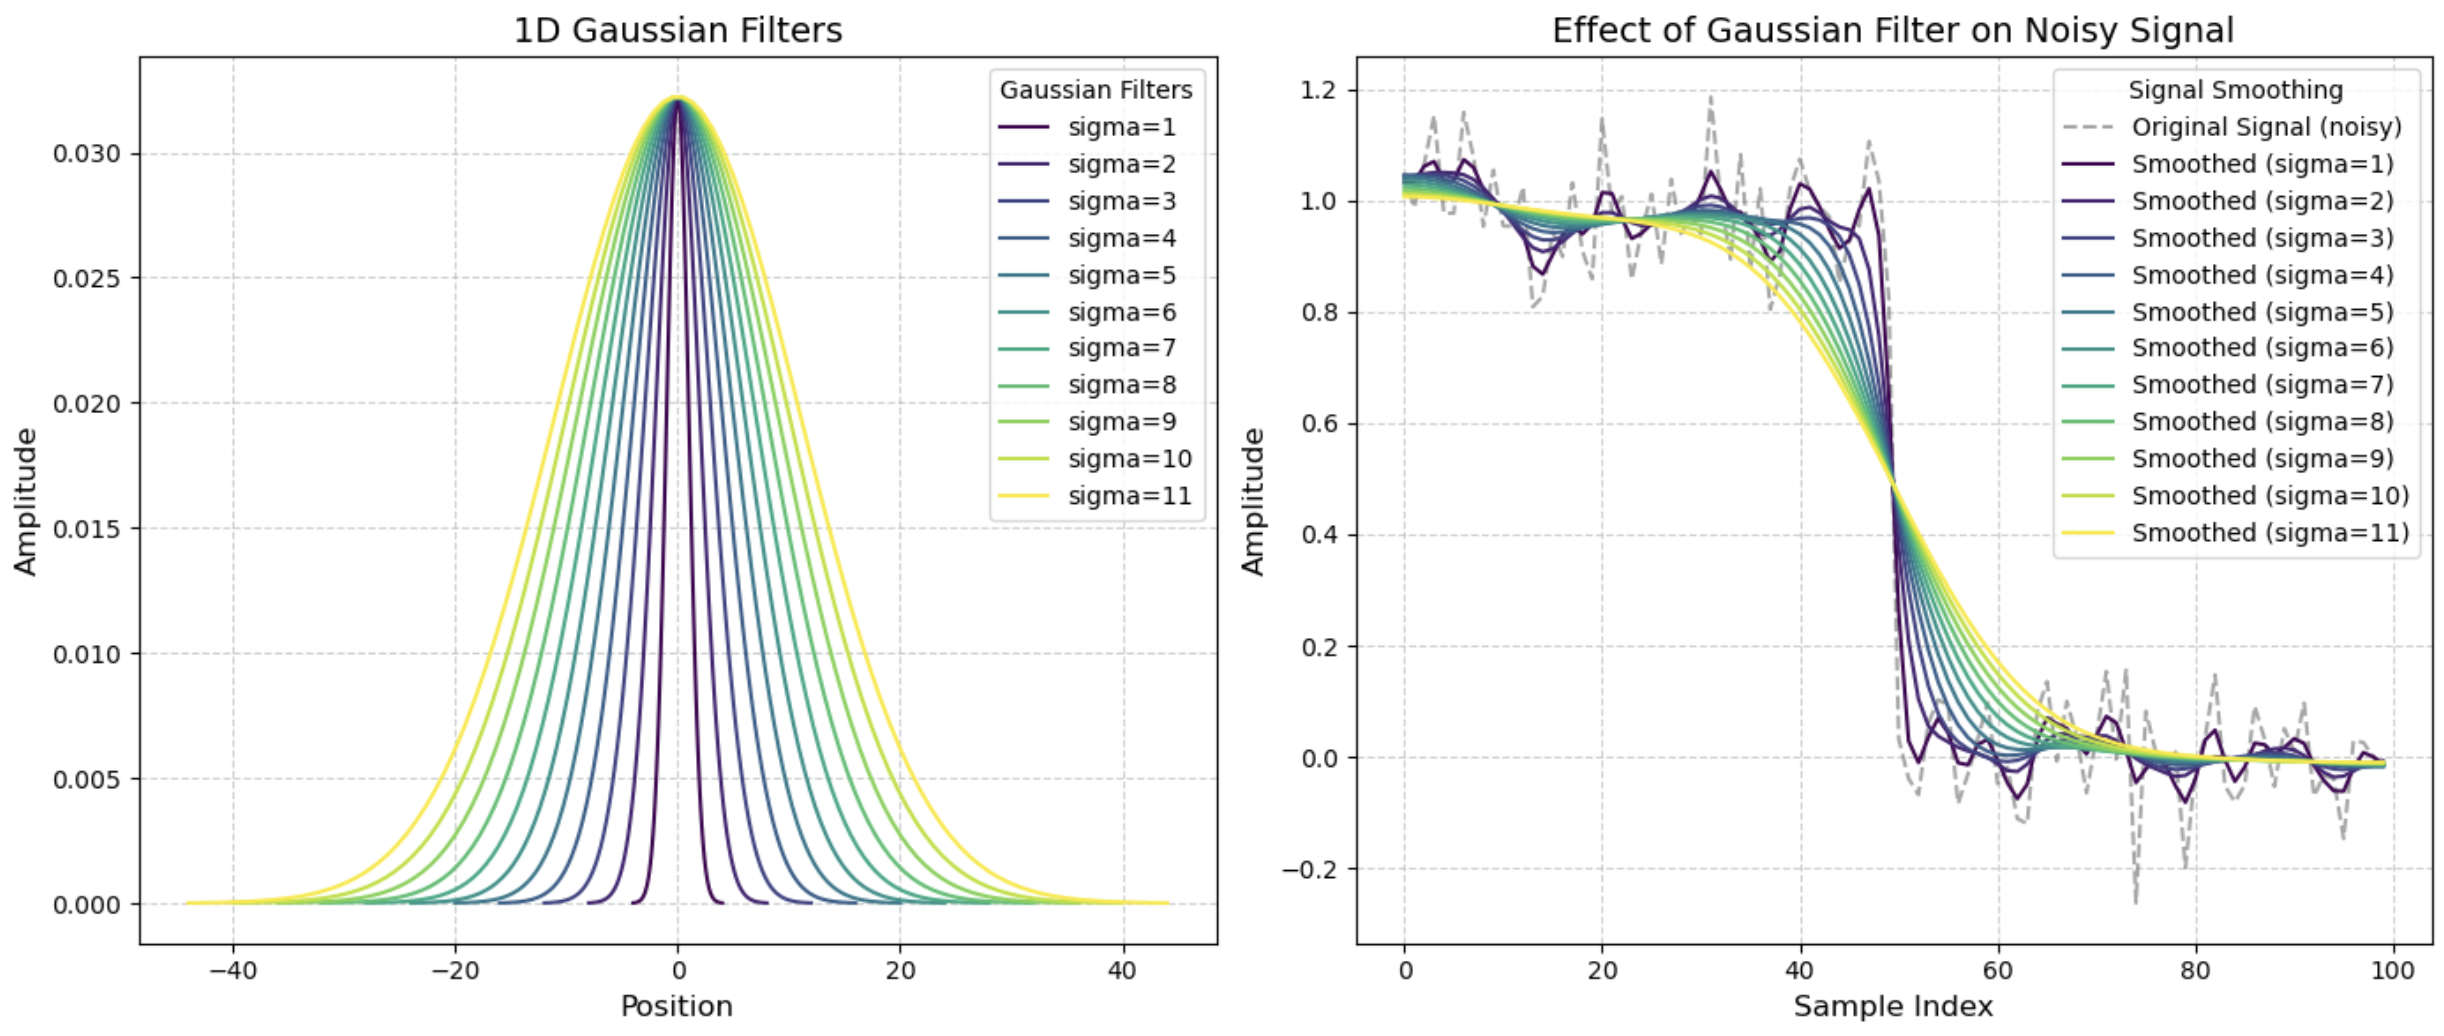

<figcaption class="figure-caption has-text-centered">Figure 2: Left: Shows the shape of the Gaussian filter for each value of sigma. Right: Demonstrates the effect of smoothing the noisy signal with each Gaussian filter.
</figcaption>
</figure>
</div>
<article class="message task"><a class="anchor" id="task_gauss1"></a>
    <div class="message-header">
        <span>Task 2: Gaussian filter</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Reflect on the effect of applying a Gaussian filter to the data and how this can affect the subsequent proccessing of the gaze signal.



</div></article>



In [0]:
# When applying a Gaussian filter to the pupil coordinates we smooth out the data.
# This means that by applying a high enough sigma value we can remove a lot of the noise as well as outliers - thus resulting
# in the model being able to identify the underlying pattern of the data.
# However, by using a too high sigma value can result in oversimplification of the data.

<article class="message task"><a class="anchor" id="task_gauss2"></a>
    <div class="message-header">
        <span>Task 3: Implementing gaussian filter</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Study the function `apply_gauss`
 in the cell below.
2. Apply a Gaussian filter to the gaze data individually for `px`
and `py`
 signals. Use the function `plot_x_and_y`
 from `filtering_util.py`
 to visualize the result.    - The function takes two arrays of data as parameters.





</div></article>



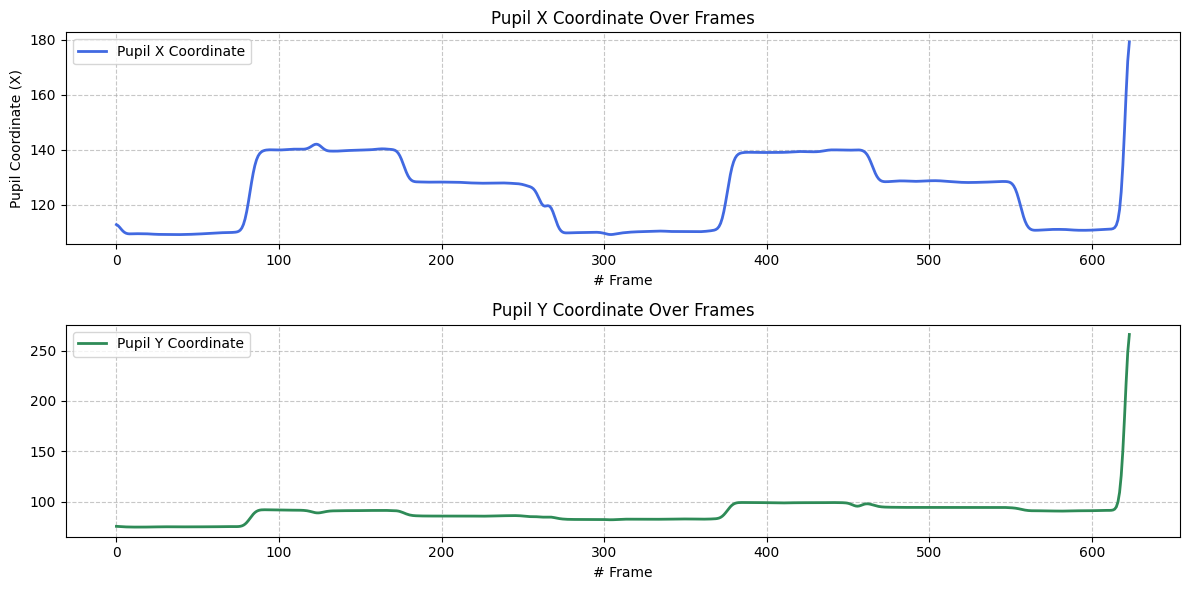

In [10]:
def apply_gauss(data, sigma = 3):
    filtered = gaussian_filter1d(data, sigma=sigma, order = 0)
    return filtered


px = np.asarray(pupil_coor['px'])
py = np.asarray(pupil_coor['py'])

# Write your implementation
filtered_x = apply_gauss(px)
filtered_y = apply_gauss(py)

filtering_util.plot_x_and_y(filtered_x, filtered_y)

<article class="message task"><a class="anchor" id="task_gauss3"></a>
    <div class="message-header">
        <span>Task 4: Reflect on applying gaussian filter</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Experiment with the `sigma`
 parameter, which value of sigma removes the noise, but maintains the signal? 
2. For which value of `sigma`
 does the important features of the signal start to disappear?



</div></article>



In [0]:
# 4.1 and 4.2
# It seems as soon as the sigma value is set to 1 the data is smoothed enough to remove the noise and outliers.
# Though it is hard to determine when the data is oversimplified.

## Partials derivatives
<article class="message task"><a class="anchor" id="task_gauss4"></a>
    <div class="message-header">
        <span>Task 5: Partial derivatives</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Recall from the lecture the partial derivatives of a signal calculated by convolving using the filter `[-1, 1]`
. What would be the result of applying the derivative filter to data smoothed by a Gaussian filter? Use the following questions to guide your answers:    - Why does this filter find the derivative of the signal?
    - Which information is gained by applying such filter to gaze data?
    - How can the output be used for further processing?
    - What is the influence of the `sigma`
 value in the Gaussian the filter when finding the partial derivatives?





</div></article>



In [0]:
# 5.1
# The information we can gain is differences in transitions.
# Thus by applying this derivative filter to the gaze we can identify when the user fixated on a point and when the user moved their gaze.
# Thus the model will have an easier time identifying gaze positions..
# The sigma value will influence the sensitivity of the filter,
# thus a higher sigma value will result in less distinct transitions shown by using the derivative filter.

The following task is about implementing a method to find derivatives a signal using the filter $[-1, 1]$. 
The function `plot_x_and_y_complete`
 from `filter_util.py`
 takes two dictionaries one for each coordinates and plots the signals. The dictionaries should contain keys value pairs of the original and processed signal. 
<article class="message task"><a class="anchor" id="partial1"></a>
    <div class="message-header">
        <span>Task 6: Calculate the derivatives</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Complete the function `get_partial_derivatives`
 to apply the derivative filter to a signal and return the absolute value of the result. Use [np.convolve](https://numpy.org/doc/2.0/reference/generated/numpy.convolve.html)
 for convolution. The **absolute value** of the derivative is used as only the rate of change is of interest. 



</div></article>



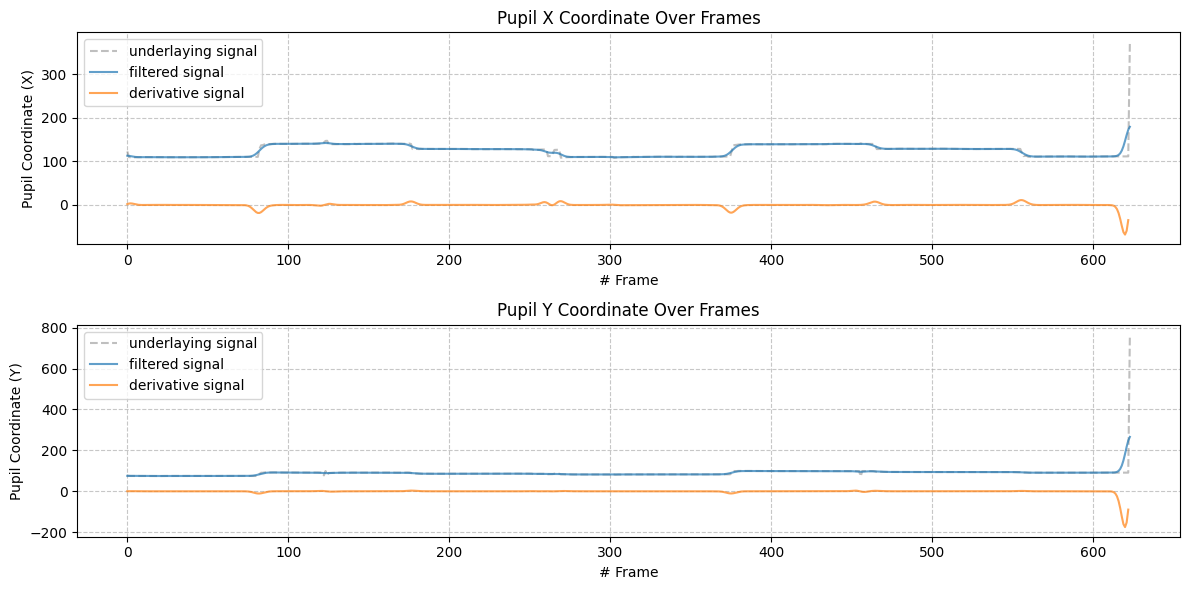

In [15]:
def get_partial_derivatives(data):
    """
    Convolve 1D data with a [-1, 1] filter.

    Args:
        data (numpy array): 1D array of data.

    Returns:
        numpy array: Convolved result.
    """
    derivative = np.convolve(data, [-1, 1], mode="same")
    return derivative

der_x = get_partial_derivatives(filtered_x)[1:]
der_y = get_partial_derivatives(filtered_y)[1:]

x_collected = {'underlaying': px, 'filtered': filtered_x, 'derivative': der_x}
y_collected = {'underlaying': py, 'filtered': filtered_y, 'derivative': der_y}

filtering_util.plot_x_and_y_complete(x_collected, y_collected)

<article class="message task"><a class="anchor" id="partial2"></a>
    <div class="message-header">
        <span>Task 7: Derivatives of a signal</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Inspect the plots above and reflect on the relation between the original signals, the filtered and the derivative of the filtered signals. In your reflections you may include:    - What charateristics in the gaze data do the peaks and plateaus encapsulate, use the data collection session to elaborate. 
    - What behaviour is expected for the `x`
 coordinate of the pupil?
    - What behaviour is expected for the `y`
 coordinate of the pupil?
    - What would happen with these if if the pattern was changed?





</div></article>



In [0]:
# The x coordinate shows horizontal movement, while the y coordinate shows vertical movement.
# After applying the Gaussian filter we see that we smooth the outputs - thus removing some noise and outliers.
# The derivative filter show transitions - thus showing when the gaze is moving and when it is fixated.

The following task are about detecting events (fixations and saccades) in eye signals using derivative filters.
<article class="message task"><a class="anchor" id="partial3"></a>
    <div class="message-header">
        <span>Task 8: Saccade detection</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Complete the function `saccade_detection`
.     - The function should identify indices for large eye movement changes called _saccades_ using the derivatives of the smoothed signal.


2. Use the function `saccade_detection`
 to detect events in the derivative signal of the filtered signal of both `px`
 and `py`




</div></article>



In [22]:
def saccade_detection(der):
    """
    Detects saccades (non-zero changes) in the derivative data.
    Parameters:
    der (1 x N numpy array): Representing the derivative of the signal.
    Returns:
    saccades (list): A list of indices where there are non-zero changes (saccades) in `x_dev`.
    """
    saccades = []
    threshold = 0.5

    for i, gaze in enumerate(der):
        if abs(gaze) > threshold:
            saccades.append(i)

    return saccades


x_saccades = saccade_detection(der_x)
y_saccades = saccade_detection(der_y)

<article class="message task"><a class="anchor" id="partial4"></a>
    <div class="message-header">
        <span>Task 9: Saccade detection</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Run the cell below to visualize the detected saccades.



</div></article>



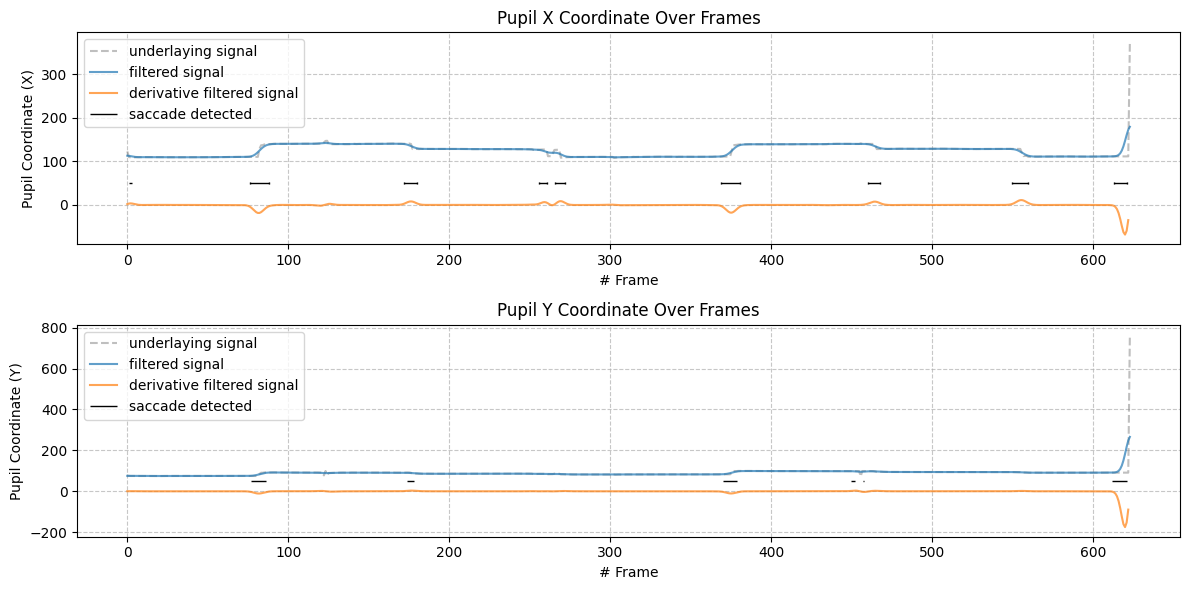

In [23]:
x_saccade = {'underlaying': px, 'filtered': filtered_x, 'derivative filtered': der_x, 'saccade': x_saccades}
y_saccade = {'underlaying': py, 'filtered': filtered_y, 'derivative filtered': der_y, 'saccade': y_saccades}

filtering_util.plot_x_and_y_complete(x_saccade, y_saccade)

<article class="message task"><a class="anchor" id="fixations1"></a>
    <div class="message-header">
        <span>Task 10: Fixation detection</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Complete the function `fixation_filtering`
 to handle noise during fixations. Select an appropriate method discussed in the lectures or draw inspiration from the experimental setup to handle noise during fixations.
2. Use the function `fixation_filtering`
 to remove the noise in the filtered signals and return cleaned signals for both `px`
 and `py`
 . 
3. Use the function `get_partial_derivatives`
 to calculate the partial derivatives of the cleaned signals.
4. Use the function `saccade_detection`
 to detect events in the derivative signal of the cleaned signal of both `px`
 and `py`
.



</div></article>



In [40]:
def fixation_filtering(px, py, x_saccades, y_saccades):
    """
    Removes noise from the input data based on detected saccades. If a spike is detected
    at a given index, the previous valid value is used to replace the current value.
    Parameters:
        px (1 x N nupy array): Representing the x coordinates (input signal).
        py (1 x N nupy array): Representing the y coordinates (input signal).
        x_saccades (list): A list of indices where saccades are detected in the x direction.
        y_saccades (list): A list of indices where saccades are detected in the y direction.
    Returns:
    px_new (list): A list of the cleaned x coordinates.
    py_new (list): A list of the cleaned y coordinates.
    """
    px_cleaned = []
    py_cleaned = []

    last_valid_px = px[0]
    last_valid_py = py[0]

    for i in range(len(px)):
        if i not in x_saccades:
            last_valid_px = px[i]
        px_cleaned.append(last_valid_px)

    for i in range(len(py)):
        if i not in y_saccades:
            last_valid_py = py[i]
        py_cleaned.append(last_valid_py)

    return px_cleaned, py_cleaned

cleaned_px, cleaned_py = fixation_filtering(px, py, x_saccades, y_saccades)
der_x_cleaned = get_partial_derivatives(cleaned_px)[1:]
der_y_cleaned = get_partial_derivatives(cleaned_py)[1:]
x_saccades_cleaned = saccade_detection(der_x_cleaned)
y_saccades_cleaned = saccade_detection(der_y_cleaned)

<article class="message task"><a class="anchor" id="fixations2"></a>
    <div class="message-header">
        <span>Task 11: Visualization of signals</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Run the cell below to visualize the fixations and saccades.



</div></article>



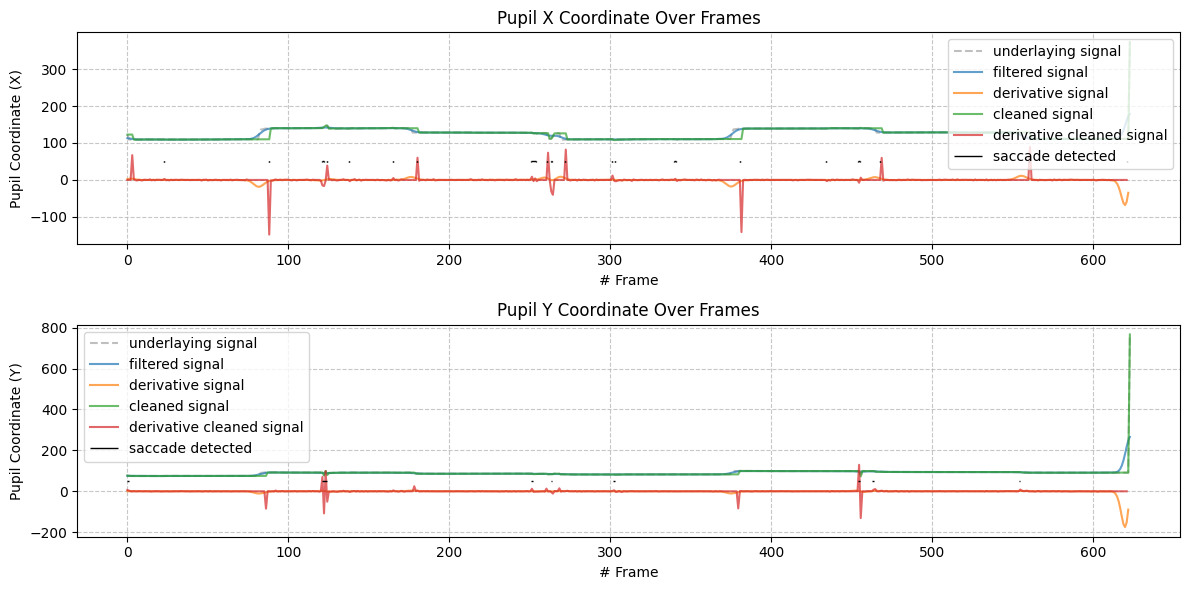

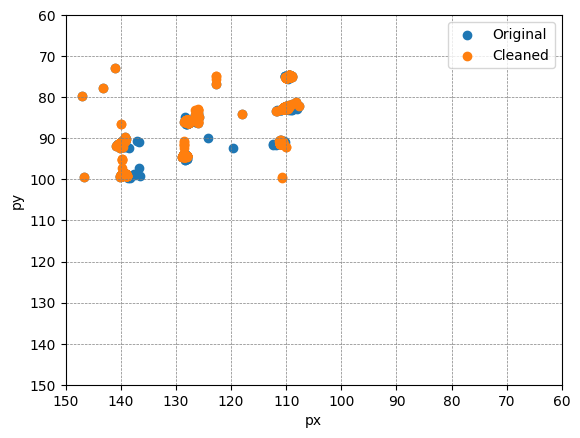

In [49]:
x_collected['cleaned'] = cleaned_px
y_collected['cleaned'] = cleaned_py

x_collected['derivative cleaned'] = der_x_cleaned[:-1]
y_collected['derivative cleaned'] = der_y_cleaned[:-1]

x_collected['saccade detected'] = x_saccades_cleaned
y_collected['saccade detected'] = y_saccades_cleaned

filtering_util.plot_x_and_y_complete(x_collected, y_collected, 5) #5 is a scaling factor on the values of the derivative for display purposes
filtering_util.plot_pupil_coor(px, py, 'Original')
filtering_util.plot_pupil_coor(cleaned_px, cleaned_py, 'Cleaned')
plt.show()

<article class="message task"><a class="anchor" id="fixation3"></a>
    <div class="message-header">
        <span>Task 12: Noise handling during fixations</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Reflect on the assumptions of your method for handling noise during fixations in [Task 10](#fixations1). What are the advantages and limitations of your approach if any?
2. Reflect on other strategies that you could use for handling the noise and outliers in the gaze data.



</div></article>



In [0]:
# As we now have the data where the eye is fixated we can use this data to identify more accurately where the user is looking -
# as we should not train the model on saccades as they are not fixated points.
# Also the limitations on how it is implemented is that if we have correct fixations on points but we move our gaze shortly after
# then we might end up identifying it as a saccade and thus remove the correct data.

# ChatGPT answer:
# The method assumes accurate saccade detection, replacing noise during fixations with the last valid value,
# which smooths the signal and stabilizes fixations. Its advantages are simplicity, efficiency, and effectiveness at removing spikes.
# However, it risks overwriting valid movements, struggles with gradual drifts or small-scale noise, and depends heavily on accurate saccade detection.
# Alternatives include Gaussian filtering for smoothing, statistical outlier removal (e.g., Z-score), adaptive filters like Kalman filters,
# or interpolation to handle noise dynamically.

The next step is to utilize the charateristics of the derivative of the smoothed signal to detect the frames (pupil coordinates) corresponding to each screen calibration point, so the data can be sorted in corresponding input and label pairs.
<article class="message task"><a class="anchor" id="fixation4"></a>
    <div class="message-header">
        <span>Task 13: Frame grouping</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Complete the function `get_frames_pupil_movement`
. The function should:    - Construct a dictionary where the keys represent the calibration point numbers (e.g., '0', '1', ..., '8'), and the associated values are tuples consisting of the start and end frame numbers.


2. Use the function `get_frames_pupil_movement`
 to determine the sections pupil corrdinate sections belonging to each calibration coordinate.



</div></article>



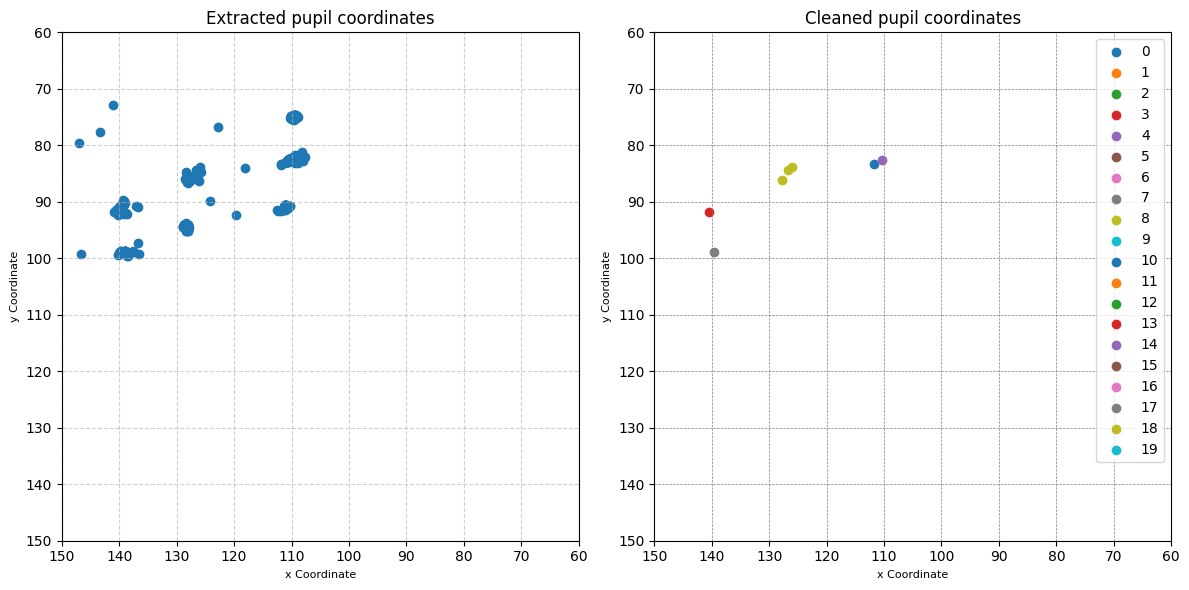

In [56]:
def get_frames_pupil_movement(cleaned_der, data):
    """
    Identifies segments of pupil movement based on changes in the cleaned derivative.
    Parameters:
        cleaned_der (list or numpy array): A 1D array of the derivative values of the cleaned data, indicating changes in pupil position over time.
        data (list or numpy array): The original data corresponding to the pupil movement.

    Returns:
        dict ( {string: tuple(int, int)} ): A dictionary where the keys are calibration point numbers (as strings) and the values are tuples
              containing the start and end frame numbers for each segment.
    """
    frames = {}
    threshold = 0.5
    start_frame = None
    calibration_counter = 0

    for i in range(len(cleaned_der)):
        if abs(cleaned_der[i]) > threshold and abs(data[i]) > threshold:
            start_frame = i if start_frame is None else start_frame
        elif start_frame is not None:
            frames[str(calibration_counter)] = (start_frame, i-1)
            calibration_counter += 1
            start_frame = None

    return frames

frames = get_frames_pupil_movement(der_x_cleaned, px)
filtering_util.plot_pupil_coordinates(frames, px, py, cleaned_px, cleaned_py)

## Analyzing results
In the following tasks the results of the filtering will be analyzed using _mean_, _variance_ and _covariance_ at each calibration target for both raw data and filtered data.
<article class="message task"><a class="anchor" id="results1"></a>
    <div class="message-header">
        <span>Task 14: Analyse results</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Run the cell below to visualize the mean, variance and covariance of the data before and after processing.



</div></article>



In [ ]:
filtering_util.plot_statistics_comparison(px, py, cleaned_px, cleaned_py, frames)

<article class="message task"><a class="anchor" id="results2"></a>
    <div class="message-header">
        <span>Task 15: Reflect</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Reflect on the results visualized in the plots.    - What effect does cleaning the data have on the mean and variance?         - Use your reflection from [Task 12](#fixation3) and reevaluate your choice of strategy, has it changes the underlaying signal in terms of mean and variance? Why? Why not? 


    - If any target points stands out, why? Relate to the experiment setup and the pupil detection method. 





</div></article>

## Inspecting own data
<article class="message task"><a class="anchor" id="owndata"></a>
    <div class="message-header">
        <span>Task 16: Combined signal</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


1. Go back to [Task 1](#task_load_data) and update the folder path to target the `grid`
 pattern of your own data.
2. Rerun the steps above.
3. Reflect on how well does the method generalizes to this dataset. You may use the following questions to guide your answers?    - How do the results differ from the ones of `test_subject_3`
?
    - Is it possible to reuse the same parameters or do they need to be updated?
    - Has the experimental setup any influence on the methods ability to generalizable? Why/why not?





</div></article>



In [0]:
# Write your reflections here...

## Event detection using gradients
In this task you will explore the combined signal (changes in x and y direction simultainously) and use the gradient for event detection. Recall the definition for the gradient of the function $f(x,y)$:

$$

\nabla f(x, y) = \left( \frac{\partial f(x,y)}{\partial x}, \frac{\partial f(x,y)}{\partial y} \right)


$$

You will use the gradient magnitude, the length of the gradient defined by:

$$
||\nabla f(x, y)|| = \sqrt{\Big(\frac{\partial f(x,y)}{\partial x}\Big)^2 + \Big(\frac{\partial f(x,y)}{\partial y} \Big)^2}
$$
<article class="message task"><a class="anchor" id="combined1"></a>
    <div class="message-header">
        <span>Task 17: Combined signal</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Complete the functions:    - `gradient_mangitude`
: The function should calculate the gradient magnitude of a $2D$ signal given `x`
 and `y`
.





</div></article>



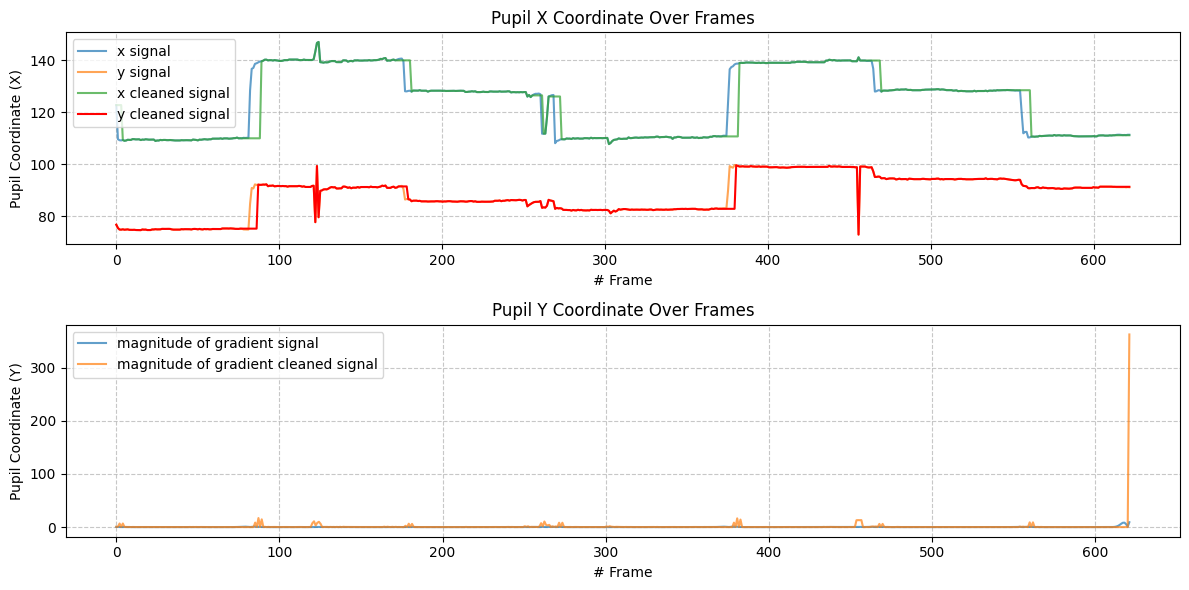

In [64]:
def gradient_mangitude(x,y):
    """
    Calculates the gradient mangitude in a 2D space.
    Args:
        x (N x 1 numpy array): Array of x coordinates.
        y (N x 1 numpy array): Array of y coordinates.
    
    Returns:
        (N x 1 numpy array): The Euclidean distance from the origin to the point (x, y).
    """
    gx = np.gradient(x)
    gy = np.gradient(y)
    return np.sqrt(gx**2 + gy**2)

magnitude = gradient_mangitude(der_x, der_y)
magnitude_cleaned = gradient_mangitude(der_x_cleaned, der_y_cleaned)

collected_signal = {}
collected_magnitude = {}
collected_signal['x'] = px[:-1]
collected_signal['y'] = py[:-1]
collected_signal['x cleaned'] = cleaned_px[:-1]
collected_signal['y cleaned'] = cleaned_py[:-1]
collected_magnitude['magnitude of gradient'] = magnitude[:-1]
collected_magnitude['magnitude of gradient cleaned'] = magnitude_cleaned[:-1]



filtering_util.plot_x_and_y_complete(collected_signal, collected_magnitude, 5) #5 is a scaling factor on the values of the derivative for display purposes

<article class="message task"><a class="anchor" id="combined2"></a>
    <div class="message-header">
        <span>Task 18: Reflect</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Reflect on the benefit of using the combined signal compared to using the two individual signals.



</div></article>



In [0]:
# Write your reflection here...